In [61]:
import geopandas as gpd
import shapely

root = "/home/galaz-garcia/python/identify_change_regions/"

# ------------------------------------------------------------------
def extract_polys(geo_df):
    polys = []
    for i in range(0, len(geo_df['geometry'])):
        polys.append(geo_df['geometry'][i])
    return shapely.geometry.MultiPolygon(polys)

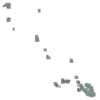

In [70]:
# --- extract polygons with aridity increase

file = "ca_arid_increase_polygons/more_arid.shp"
more_arid = gpd.read_file(root+file)
#print(more_arid)
# type(more_arid['geometry'][0]) = shapely.geometry.polygon.Polygon
more_arid_polys = extract_polys(more_arid)

# --- extract polygons with temperature increase
file = "ca_temp_increase_polygons/hotter_regions.shp"
hotter = gpd.read_file(root+file)
#print(hotter)
hotter_polys = extract_polys(hotter)

# ---- intersect arid and temp regions ----
inter  = more_arid_polys.intersection(hotter_polys)
inter

In [14]:
# --- extract polygons with aridity increase
file = "ca_biomass_decrease_polygons/ca_less_bio.shp"
less_bio = gpd.read_file(root+file)
#print(less_bio)


In [67]:
# there is a missmatch in the CRS, we need to solve this before intersecting
# Shapely does not support coordinate system transformations. 
# All operations on two or more features presume that the features exist in the same Cartesian plane.

print(less_bio.crs == more_arid.crs)
print(more_arid.crs == hotter.crs)

# -- match CRS
match_less_bio = less_bio.to_crs(more_arid.crs)

# -- extract polygons
lessbio_polys = extract_polys(match_less_bio)

False
True


In [68]:
all_inter = inter.intersection(lessbio_polys)
all_inter

In [48]:
# -- export intersection polygons
df = gpd.GeoDataFrame() 
i = 0
for i in range(0,len(all_inter.geoms)):
    df.loc[i,'geometry'] = all_inter.geoms[i]    

df.crs = more_arid.crs
df

In [57]:
outfp = "/home/galaz-garcia/python/identify_change_regions/change_intersections_08_19/change_intersections_08_19.shp"
df.to_file(outfp)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich